In [1]:
import pandas as pd # Data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# lets import our dataset(loan) from a file location on the system
project1 = pd.read_csv("AutoData.csv",header = 0)

In [3]:
project1.head()

,S/N,AUTO ID,AGE,GENDER,SPECIALTY,SPECIALTY IN A BRAND,"YES, WHICH BRAND",WHY THE BRAND,"NO, BRAND MOSTLY WORK ON",BRAND ENJOY THE MOST,WHY CUSTOMER USE BRAND,BRAND TO RECOMMEND
0,1,101,30+,female,mechanic,No,NaN,NaN,honda,honda,Easy maintenance,Honda
1,2,102,30+,Male,Panel beater,yes,toyota,easy maintenance,NaN,NaN,NaN,toyota
2,3,103,30+,male,mechanic,yes,m/benz,easy maintenance,NaN,NaN,NaN,M/ Benz
3,4,104,30+,Male,Electrician,No,NaN,NaN,Toyota,Honda,Easy maintenance,Toyota
4,5,105,30+,Male,Mechanic,Yes,Peugeot,Easy maintenance,NaN,NaN,NaN,Peugeot


In [4]:
project1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   S/N                       50 non-null     int64 
 1   AUTO ID                   50 non-null     int64 
 2   AGE                       50 non-null     object
 3   GENDER                    50 non-null     object
 4   SPECIALTY                 50 non-null     object
 5   SPECIALTY IN A BRAND      50 non-null     object
 6   YES, WHICH BRAND          46 non-null     object
 7   WHY THE BRAND             40 non-null     object
 8   NO, BRAND MOSTLY WORK ON  40 non-null     object
 9   BRAND ENJOY THE MOST      41 non-null     object
 10  WHY CUSTOMER USE BRAND    41 non-null     object
 11  BRAND TO RECOMMEND        44 non-null     object
dtypes: int64(2), object(10)
memory usage: 4.8+ KB


In [7]:
project1.isna().sum()

S/N                          0
AUTO ID                      0
AGE                          0
GENDER                       0
SPECIALTY                    0
SPECIALTY IN A BRAND         0
YES, WHICH BRAND             4
WHY THE BRAND               10
NO, BRAND MOSTLY WORK ON    10
BRAND ENJOY THE MOST         9
WHY CUSTOMER USE BRAND       9
BRAND TO RECOMMEND           6
dtype: int64

In [8]:
project1.tail()

,S/N,AUTO ID,AGE,GENDER,SPECIALTY,SPECIALTY IN A BRAND,"YES, WHICH BRAND",WHY THE BRAND,"NO, BRAND MOSTLY WORK ON",BRAND ENJOY THE MOST,WHY CUSTOMER USE BRAND,BRAND TO RECOMMEND
45,46,146,26 - 30,Male,Electrician,Yes,Honda,Easy maintenance,Honda,Honda,Easy maintenance,Toyota
46,47,147,26 - 30,Male,Panel beater,Yes,Toyota,Cheap parts,Honda,Toyota,Easy maintenance,Toyota
47,48,148,21 - 25,Male,Panel beater,Yes,Nissan,Easy maintenance,Toyota,Toyota,Easy maintenance,Toyota
48,49,149,26 - 30,Male,Mechanic,Yes,Honda,Cheap parts,Honda,Toyota,Easy maintenance,Toyota
49,50,150,21 - 25,Male,Vulcanizer,Yes,All Brand,NaN,NaN,NaN,NaN,NaN


In [9]:
project1.columns

Index(['S/N', 'AUTO ID', 'AGE', 'GENDER', 'SPECIALTY', 'SPECIALTY IN A BRAND',
       'YES, WHICH BRAND', 'WHY THE BRAND', 'NO, BRAND MOSTLY WORK ON',
       'BRAND ENJOY THE MOST', 'WHY CUSTOMER USE BRAND', 'BRAND TO RECOMMEND'],
      dtype='object')

C:\Users\Light\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Light\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


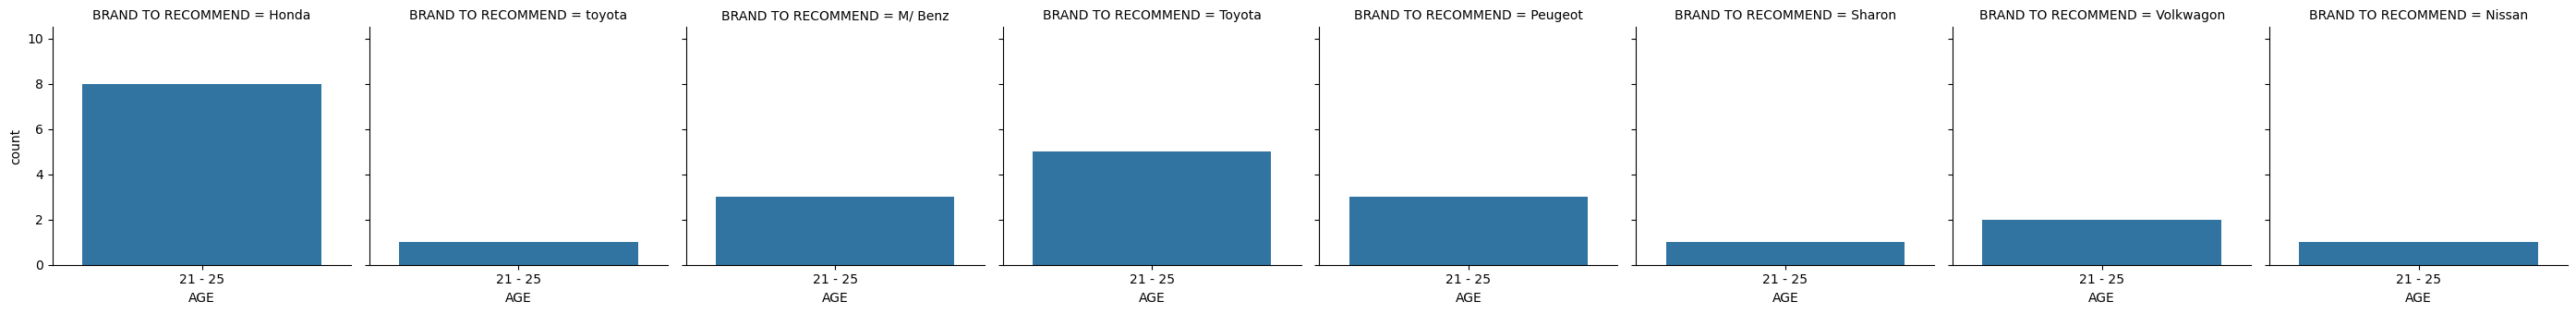

In [10]:
# comparing two columns
grid = sns.FacetGrid(project1,col="BRAND TO RECOMMEND",height = 3.5, aspect = 1.0)
grid.map(sns.countplot, "AGE");

C:\Users\Light\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Light\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


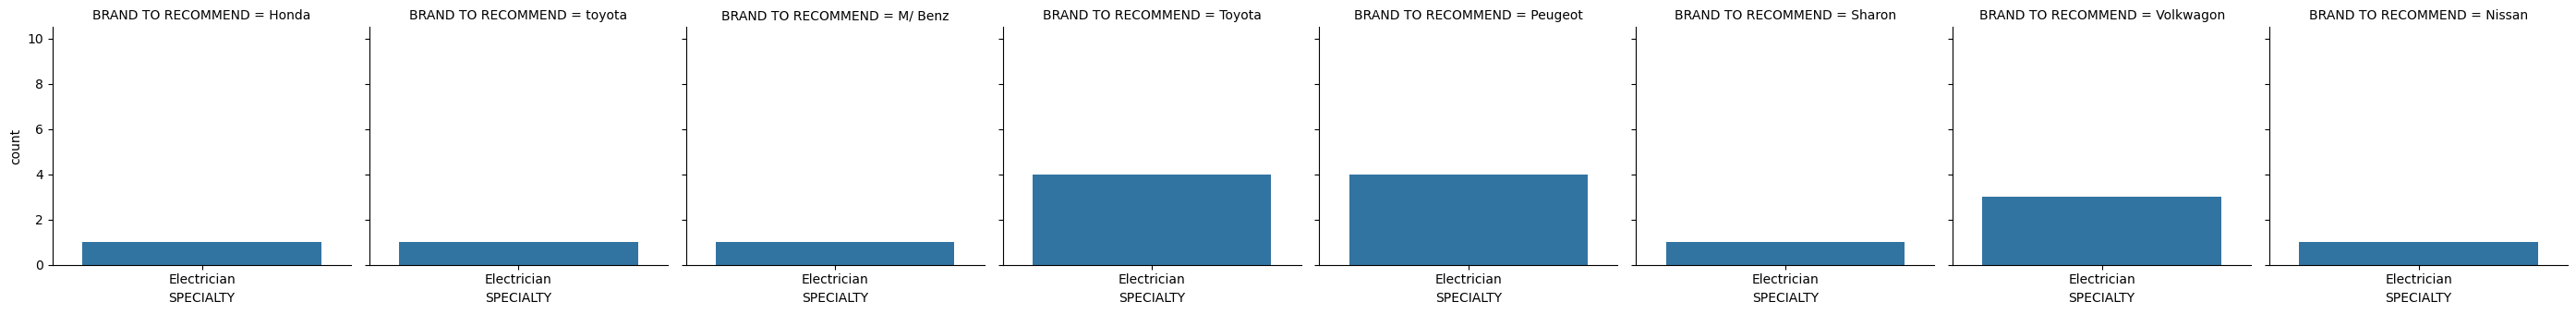

In [11]:
# comparing two columns
grid = sns.FacetGrid(project1,col="BRAND TO RECOMMEND",height = 3.5, aspect = 1.0)
grid.map(sns.countplot, "SPECIALTY");

C:\Users\Light\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Light\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


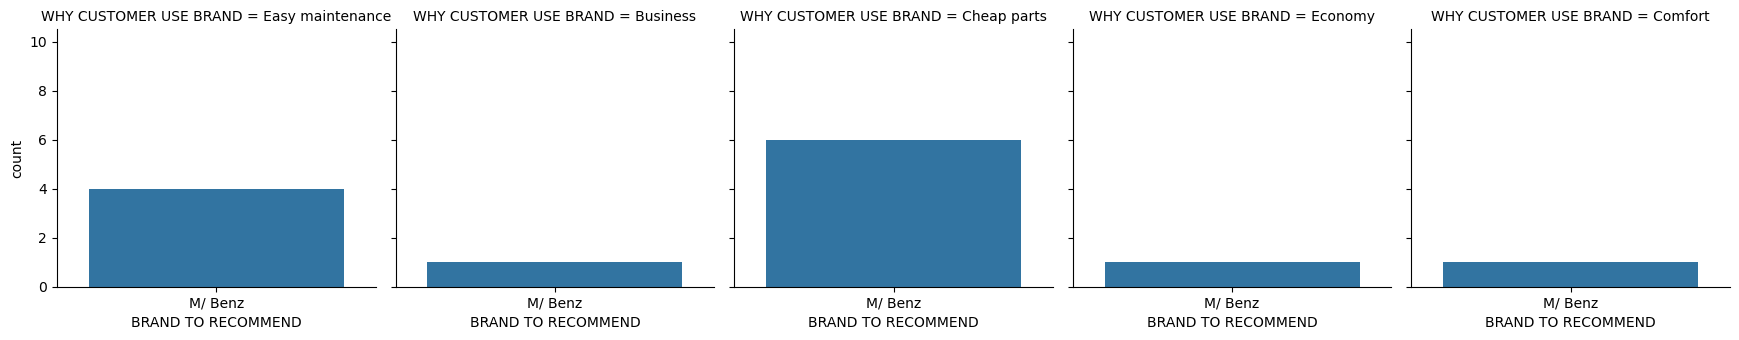

In [12]:
# comparing two columns
grid = sns.FacetGrid(project1,col="WHY CUSTOMER USE BRAND",height = 3.5, aspect = 1.0)
grid.map(sns.countplot, "BRAND TO RECOMMEND");

C:\Users\Light\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Light\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


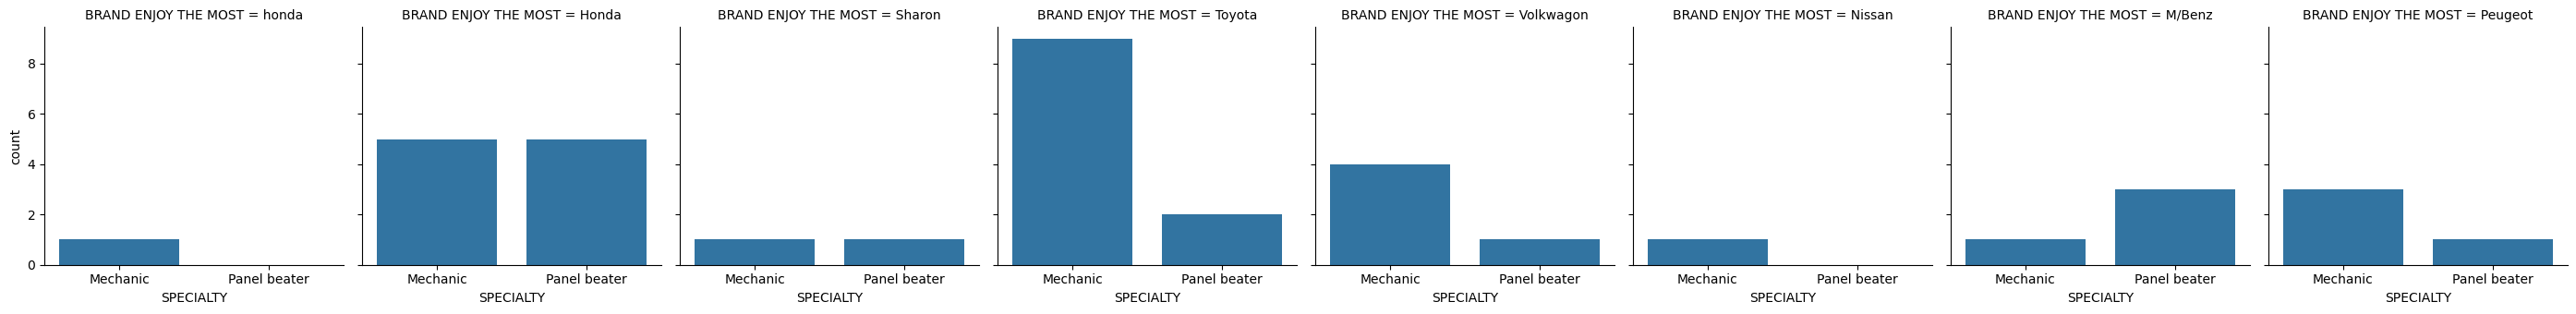

In [14]:
# comparing two columns
grid = sns.FacetGrid(project1,col="BRAND ENJOY THE MOST",height = 3.5, aspect = 1.0)
grid.map(sns.countplot, "SPECIALTY");

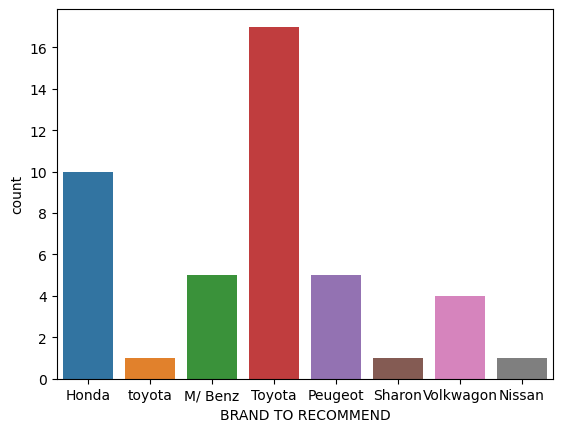

In [15]:
sns.countplot(x ='BRAND TO RECOMMEND', data= project1)
plt.show()

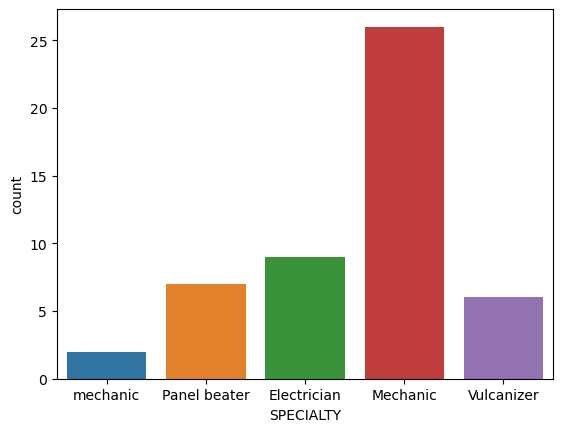

In [16]:
sns.countplot(x ='SPECIALTY', data= project1)
plt.show()

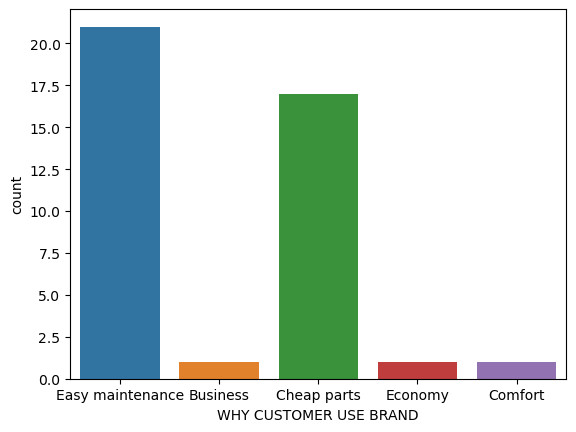

In [17]:
sns.countplot(x ='WHY CUSTOMER USE BRAND', data= project1)
plt.show()

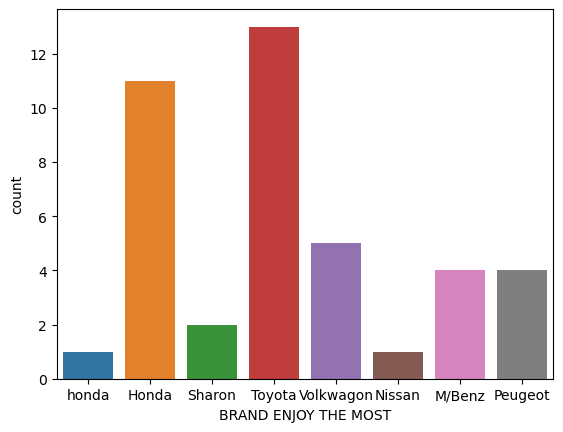

In [18]:
sns.countplot(x ='BRAND ENJOY THE MOST', data= project1)
plt.show()

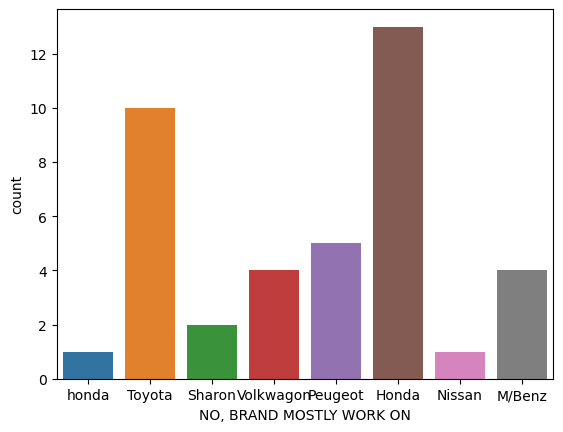

In [19]:
sns.countplot(x ='NO, BRAND MOSTLY WORK ON', data= project1)
plt.show()